# Utilizar un modelo preentrenado

[![](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ganegroup/workshop_nn/blob/main/11_modelo_preentrenado.ipynb)

Este notebook muestra cómo utilizar un modelo preentrenado para hacer una clasificación

In [1]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

2023-07-02 17:17:24.878929: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = VGG16(
    weights="imagenet",
    include_top=True, 
    input_shape=(224, 224, 3)
    )

2023-07-02 17:17:26.026426: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 17:17:26.056887: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 17:17:26.059678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

553467096/553467096 [==============================] - 32s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
import ipywidgets as widgets
from io import BytesIO

In [5]:
upload = widgets.FileUpload(
    accept='image/*',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

upload

FileUpload(value=(), accept='image/*', description='Upload')

In [ ]:
f = BytesIO(upload.data[0])

image = load_img(f, target_size=(224, 224))

image = img_to_array(image)

image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

image = preprocess_input(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


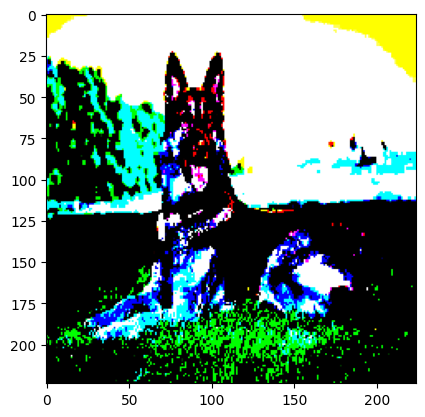

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image[0])

In [ ]:
prediction = model.predict(image)

prediction

2023-05-03 21:11:38.693291: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


1/1 [==============================] - 1s 1s/step


2023-05-03 21:11:39.139167: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


array([[1.67639774e-11, 4.76772593e-13, 8.47687961e-11, 1.59589061e-11,
        1.05093339e-11, 5.78096902e-12, 7.86729677e-13, 4.24504959e-10,
        8.40810921e-10, 1.97149640e-11, 9.38721583e-12, 4.39004258e-12,
        5.32694808e-12, 9.44690159e-12, 8.24336519e-12, 2.10956721e-11,
        1.11343990e-11, 4.53920124e-10, 2.57594380e-12, 3.04731136e-11,
        1.34655004e-12, 3.07427694e-11, 1.25469427e-12, 3.45552493e-12,
        5.81411530e-10, 1.15191807e-10, 2.23893369e-11, 1.14934971e-11,
        5.63546475e-12, 2.28282128e-12, 2.96493255e-12, 2.62226438e-12,
        3.36530782e-12, 2.59346239e-10, 5.57979940e-10, 4.24337961e-11,
        1.75589491e-11, 1.19060969e-10, 5.11355324e-12, 5.62890099e-12,
        6.52971470e-12, 9.99347198e-13, 4.04963866e-12, 3.38016976e-11,
        4.44136785e-12, 3.83771487e-11, 1.83541485e-12, 1.57722863e-11,
        2.18297927e-12, 3.35025271e-11, 1.94173566e-10, 1.40820611e-09,
        1.16798611e-11, 3.37114126e-12, 1.59185946e-11, 4.500368

In [ ]:
prediction[0].argmax()

235

In [ ]:
prediction[0][235]

0.9943453

In [ ]:
label = decode_predictions(prediction)

label

35363/35363 [==============================] - 0s 1us/step


[[('n02106662', 'German_shepherd', 0.9943453),
  ('n02105162', 'malinois', 0.0048330775),
  ('n02096051', 'Airedale', 0.00020313154),
  ('n03803284', 'muzzle', 0.00020305833),
  ('n02105251', 'briard', 0.00014198826)]]